In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
print(f"columns: {df.shape[0]} rows: {df.shape[1]}")

columns: 284807 rows: 31


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [68]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, explorative=True)
# profile.to_file("eda_report.html")

2025-01-31 15:22:35,606 - INFO     - Pandas backend loaded 2.1.3
2025-01-31 15:22:35,609 - INFO     - Numpy backend loaded 1.26.2
2025-01-31 15:22:35,609 - INFO     - Pyspark backend NOT loaded
2025-01-31 15:22:35,610 - INFO     - Python backend loaded
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 23.21it/s]


<Axes: xlabel='Class'>

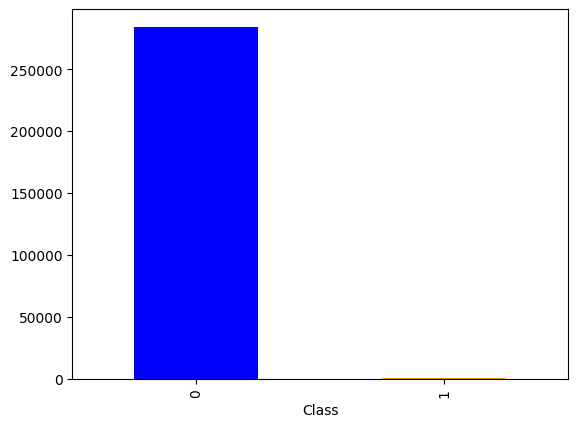

In [49]:
df['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])

In [50]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: >

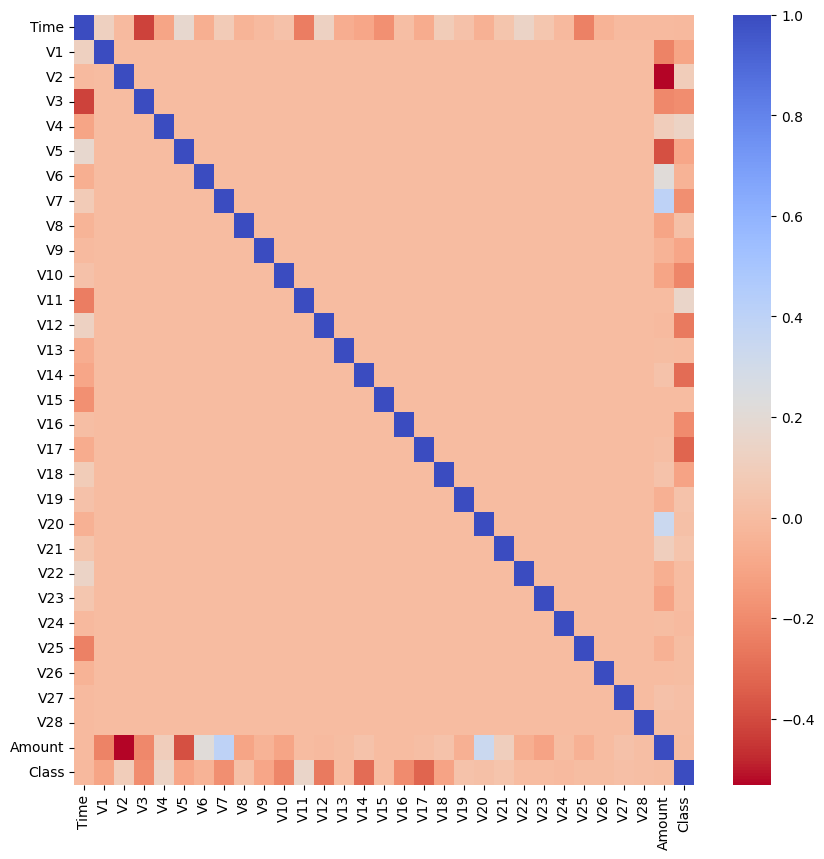

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)

In [53]:
# negative correlation - the lower the value the more likely it will be fraud transaction
neg_corr = ['V17', 'V14', 'V12', 'V10']

# positive correlation - the higher the value the more likely it will be fraud transaction
pos_corr = ['V2', 'V4', 'V11']

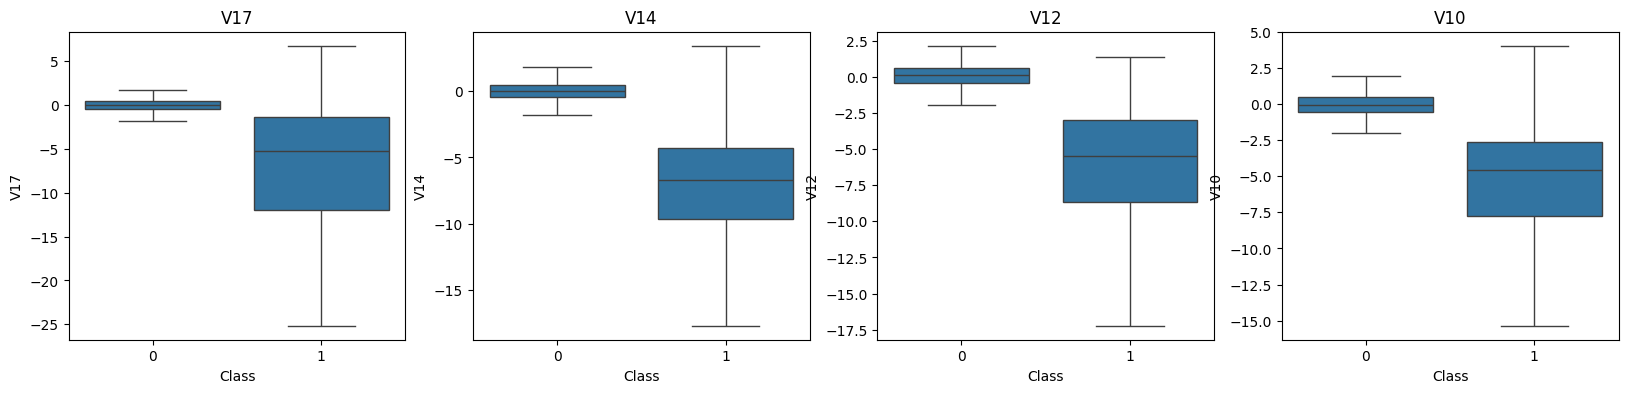

In [54]:
fig, ax = plt.subplots(ncols=len(neg_corr), figsize=(20,4))

for i in range(len(neg_corr)):
    sns.boxplot(x='Class', y=neg_corr[i], data=df, ax=ax[i], showfliers=False)
    ax[i].set_title(f"{neg_corr[i]}")

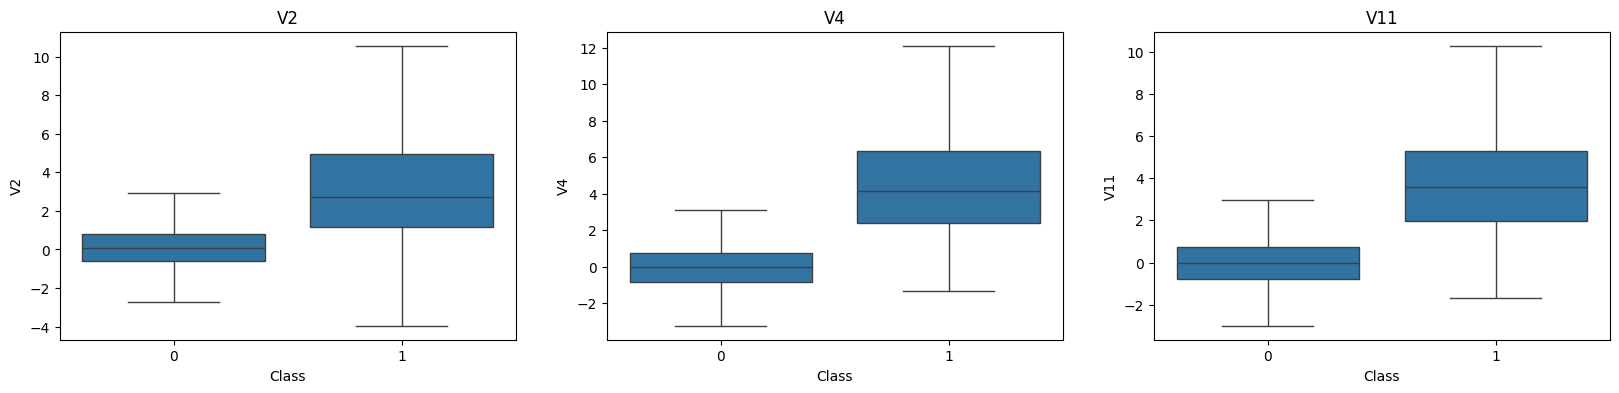

In [55]:
fig, ax = plt.subplots(ncols=len(pos_corr), figsize=(20,4))

for i in range(len(pos_corr)):
    sns.boxplot(x='Class', y=pos_corr[i], data=df, ax=ax[i], showfliers=False)
    ax[i].set_title(f"{pos_corr[i]}")

In [113]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

In [96]:
# prepare feature matrix and target vector

X = df.drop('Class', axis=1)
y = df['Class']

# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
columns_scale = ['Time', 'Amount']

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_scale)
    ],
    remainder='passthrough'
)

In [107]:
pipeline_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

In [108]:
pipeline_rf.fit(X_train, y_train)

y_proba_rf = pipeline_rf.predict_proba(X_test)[:,1]

In [109]:
precision, recall, threshold = precision_recall_curve(y_test, y_proba_rf)

threshold_index = (recall >= 0.8) & (recall <= 0.9)

best_threshold = threshold[threshold_index.argmax()]

In [110]:
y_pred_adjusted_rf = (y_proba_rf >= best_threshold).astype(int)

In [ ]:
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))
print(f"Optimal threshold: {best_threshold:.3f}")
print(classification_report(y_test, y_pred_adjusted_rf))

Test ROC-AUC Score: 0.9821362756245782
Optimal threshold: 0.260
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.73      0.90      0.81       136

    accuracy                           1.00     85443
   macro avg       0.87      0.95      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [116]:
pipeline_svm = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.1, random_state=42)),
    ('classifier', SVC(kernel='rbf', class_weight='balanced', probability=True))
])

In [117]:
pipeline_svm.fit(X_train, y_train)

y_proba_svm = pipeline_svm.predict_proba(X_test)[:,1]
y_pred_svm = (y_proba_svm >= 0.26).astype(int)

In [118]:
print("SVM Test ROC-AUC Score:", roc_auc_score(y_test, y_proba_svm))
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

SVM Test ROC-AUC Score: 0.9756282499401814
Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.22      0.85      0.34       136

    accuracy                           0.99     85443
   macro avg       0.61      0.92      0.67     85443
weighted avg       1.00      0.99      1.00     85443



In [120]:
import xgboost as xgb

# Define model
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Handle class imbalance
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

# Train model
xgb_model.fit(X_train, y_train)

# Make predictions
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_proba_xgb >= 0.26).astype(int)  # Use same threshold

In [121]:
print("XGBoost Test ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Test ROC-AUC Score: 0.9802227284292924
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.66      0.88      0.76       136

    accuracy                           1.00     85443
   macro avg       0.83      0.94      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [122]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'n_estimators': [50, 100, 200],
    'scale_pos_weight': [len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
}

grid_search = GridSearchCV(xgb.XGBClassifier(objective="binary:logistic", use_label_encoder=False), 
                           param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'scale_pos_weight': 559.0112359550562}


In [123]:
y_proba_xgb_opti = grid_search.predict_proba(X_test)[:, 1]
y_pred_xgb_opti = (y_proba_xgb_opti >= 0.26).astype(int)  # Use same threshold

In [124]:
print("XGBoost Test ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb_opti))
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb_opti))

XGBoost Test ROC-AUC Score: 0.9828230253499645
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.85      0.87       136

    accuracy                           1.00     85443
   macro avg       0.95      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443

